In [2]:
# Importing the necessary packages
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from surprise import Dataset
from surprise import Reader
from surprise.model_selection import cross_validate
from surprise.model_selection import GridSearchCV
from surprise import KNNBasic, KNNWithMeans, KNNWithZScore
from surprise import SVD, SVDpp, NMF
from surprise import SlopeOne, CoClustering

df = pd.read_csv('./Untitled Folder/ratings.csv')

In [3]:
# Load review ratings and verify data
print('Rows:', df.shape[0], '; Columns:', df.shape[1], '\n')

df.head()

Rows: 100836 ; Columns: 4 



,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
userId       100836 non-null int64
movieId      100836 non-null int64
rating       100836 non-null float64
timestamp    100836 non-null int64
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [5]:
# Drop unnecessary columns
df = df.drop(columns='timestamp')

In [6]:
df.describe()

,userId,movieId,rating
count,100836.000000,100836.000000,100836.000000
mean,326.127564,19435.295718,3.501557
std,182.618491,35530.987199,1.042529
min,1.000000,1.000000,0.500000
25%,177.000000,1199.000000,3.000000
50%,325.000000,2991.000000,3.500000
75%,477.000000,8122.000000,4.000000
max,610.000000,193609.000000,5.000000


In [7]:
# showing the number of unique items 
print('No. of Unique Users    :', df.userId.nunique())
print('No. of Unique Movies :', df.movieId.nunique())
print('No. of Unique Ratings  :', df.rating.nunique())

No. of Unique Users    : 610
No. of Unique Movies : 9724
No. of Unique Ratings  : 10


In [8]:
# grouping the ratings column so that it can be graphed
rts_gp = df.groupby(by=['rating']).agg({'userId': 'count'}).reset_index()
rts_gp.columns = ['Rating', 'Count']

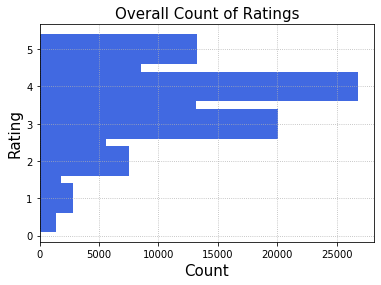

In [9]:
plt.barh(rts_gp.Rating, rts_gp.Count, color='royalblue')
plt.title('Overall Count of Ratings', fontsize=15)
plt.xlabel('Count', fontsize=15)
plt.ylabel('Rating', fontsize=15)
plt.grid(ls='dotted')
plt.show()

In [10]:

reader = Reader()

# Load data with reader and build a trainset()
data = Dataset.load_from_df(df, reader)
Data = data.build_full_trainset()

# Cross Validation

In [11]:
# cross validation with the different algorithms

In [12]:
knnbasic_cv = cross_validate(KNNBasic(), data, cv=2, n_jobs=-1, verbose=False)
knnmeans_cv = cross_validate(KNNWithMeans(), data, cv=2, n_jobs=-1, verbose=False)
knnz_cv = cross_validate(KNNWithZScore(), data, cv=2, n_jobs=-1, verbose=False)

In [13]:
svd_cv = cross_validate(SVD(), data, cv=2, n_jobs=-1, verbose=False)
svdpp_cv = cross_validate(SVDpp(), data, cv=2, n_jobs=-1, verbose=False)
nmf_cv = cross_validate(NMF(), data, cv=2, n_jobs=-1, verbose=False)

In [14]:
slope_cv = cross_validate(SlopeOne(), data, cv=2, n_jobs=-1, verbose=False)
coclus_cv = cross_validate(CoClustering(), data, cv=2, n_jobs=-1, verbose=False)

In [15]:
print('Algorithm\t RMSE\t\t MAE')
print()
print('KNN Basic', '\t', round(knnbasic_cv['test_rmse'].mean(), 4), '\t', round(knnbasic_cv['test_mae'].mean(), 4))
print('KNN Means', '\t', round(knnmeans_cv['test_rmse'].mean(), 4), '\t', round(knnmeans_cv['test_mae'].mean(), 4))
print('KNN ZScore', '\t', round(knnz_cv['test_rmse'].mean(), 4), '\t', round(knnz_cv['test_mae'].mean(), 4))
print()
print('SVD', '\t\t', round(svd_cv['test_rmse'].mean(), 4), '\t', round(svd_cv['test_mae'].mean(), 4))
print('SVDpp', '\t\t', round(svdpp_cv['test_rmse'].mean(), 4), '\t', round(svdpp_cv['test_mae'].mean(), 4))
print('NMF', '\t\t', round(nmf_cv['test_rmse'].mean(), 4), '\t', round(nmf_cv['test_mae'].mean(), 4))
print()
print('SlopeOne', '\t', round(slope_cv['test_rmse'].mean(), 4), '\t', round(slope_cv['test_mae'].mean(), 4))
print('CoClustering', '\t', round(coclus_cv['test_rmse'].mean(), 4), '\t', round(coclus_cv['test_mae'].mean(), 4))
print()

# closer to 0 the better
# SVDpp has performed the best for RMSE and MAE

Algorithm	 RMSE		 MAE

KNN Basic 	 0.9715 	 0.7467
KNN Means 	 0.9211 	 0.7048
KNN ZScore 	 0.9163 	 0.6954

SVD 		 0.8903 	 0.6862
SVDpp 		 0.8795 	 0.6756
NMF 		 0.9561 	 0.7344

SlopeOne 	 0.9264 	 0.7109
CoClustering 	 0.966 	 0.7488



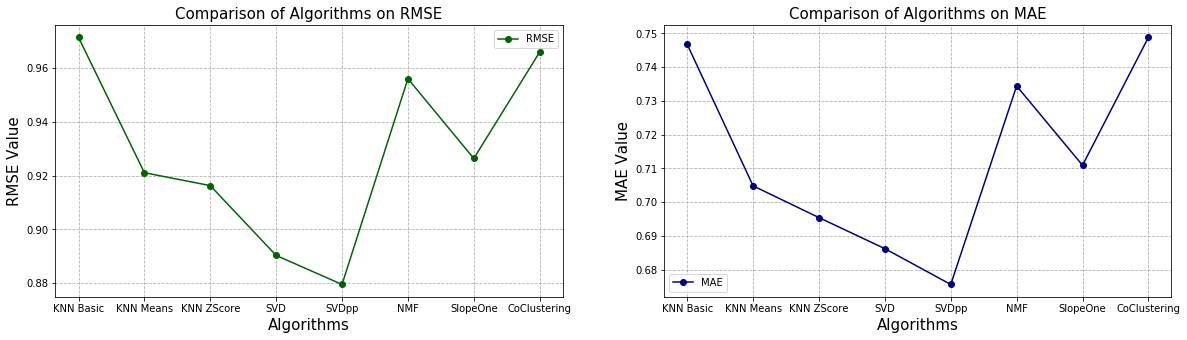

In [16]:
# plotting scores of the different algorithms
x_algo = ['KNN Basic', 'KNN Means', 'KNN ZScore', 'SVD', 'SVDpp', 'NMF', 'SlopeOne', 'CoClustering']
all_algos_cv = [knnbasic_cv, knnmeans_cv, knnz_cv, svd_cv, svdpp_cv, nmf_cv, slope_cv, coclus_cv]

rmse_cv = [round(res['test_rmse'].mean(), 4) for res in all_algos_cv]
mae_cv = [round(res['test_mae'].mean(), 4) for res in all_algos_cv]

plt.figure(figsize=(20,5))

plt.subplot(1, 2, 1)
plt.title('Comparison of Algorithms on RMSE', loc='center', fontsize=15)
plt.plot(x_algo, rmse_cv, label='RMSE', color='darkgreen', marker='o')
plt.xlabel('Algorithms', fontsize=15)
plt.ylabel('RMSE Value', fontsize=15)
plt.legend()
plt.grid(ls='dashed')

plt.subplot(1, 2, 2)
plt.title('Comparison of Algorithms on MAE', loc='center', fontsize=15)
plt.plot(x_algo, mae_cv, label='MAE', color='navy', marker='o')
plt.xlabel('Algorithms', fontsize=15)
plt.ylabel('MAE Value', fontsize=15)
plt.legend()
plt.grid(ls='dashed')

plt.show()

In [17]:
# Perform a gridsearch with SVDpp because this algorithm performed the best.
params = {'n_factors': [20, 50, 100],
         'reg_all': [0.02, 0.05, 0.1]}
svdpp_gs = GridSearchCV(SVDpp, param_grid = params, measures=['rmse', 'mae'], cv=2, n_jobs=-1)


In [18]:
# print out optimal parameters for SVDpp after GridSearchCV
# print('RMSE =', svdpp.best_params['rmse'])
# print('MAE =', svdpp.best_params['mae'])

### after having done this and then editing my project, I know what the best parameters are. This line of 
### code takes a long time to run! n_factors = 55, reg_all = 0.04
# print('SVDpp - RMSE:', round(svdpp.best_score['rmse'], 4), '; MAE:', round(svdpp.best_score['mae'], 4))


In [19]:
# fitting the model with the best parameters
svdpp = SVDpp(n_factors= 55, reg_all=0.04)
svdpp.fit(Data)


In [20]:
# importing the ratings
df_movies = pd.read_csv('./Untitled Folder/movies.csv')

In [21]:
# checking to see if it worked
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [22]:
# info on the data
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
movieId    9742 non-null int64
title      9742 non-null object
genres     9742 non-null object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [23]:
df_movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [24]:
svdpp.predict(2, 4)

Prediction(uid=2, iid=4, r_ui=None, est=3.080997615350973, details={'was_impossible': False})

In [25]:
# returns a collection of dictionaries in the format of {'userId': int , 'movieId': int , 'rating': float}
def movie_rater(movie_df,num, genre=None):
    userID = 1000
    rating_list = []
    while num > 0:
        if genre:
            movie = movie_df[movie_df['genres'].str.contains(genre)].sample(1)
        else:
            movie = movie_df.sample(1)
        print(movie)
        rating = input('How do you rate this movie on a scale of 1-5, press n if you have not seen :\n')
        if rating == 'n':
            continue
        else:
            rating_one_movie = {'userId':userID,'movieId':movie['movieId'].values[0],'rating':rating}
            rating_list.append(rating_one_movie) 
            num -= 1
    return rating_list      
        

In [ ]:
# rate 50 movies that you HAVE seen. The more movies that you rate, the more accurate the results will be.
user_rating = movie_rater(df_movies, 50)

      movieId                title                                    genres
1480     2005  Goonies, The (1985)  Action|Adventure|Children|Comedy|Fantasy


In [ ]:
# here are your ratings
print('Number of Movies Rated:', len(user_rating))
user_rating



In [ ]:
# add the new ratings to the original ratings DataFrame
new_ratings_df = df.append(user_rating, ignore_index=True)
new_data = Dataset.load_from_df(new_ratings_df, reader)

In [ ]:
new_ratings_df

In [ ]:
new_ratings_df.info()

In [ ]:
# train a model using the new combined DataFrame and using the parameters from before.
svd_ = SVDpp(n_factors= 55, reg_all=0.04)
svd_.fit(new_data.build_full_trainset())

In [ ]:
# make predictions for the user
list_of_movies = []
for m_id in df['movieId'].unique():
    list_of_movies.append( (m_id,svd_.predict(1000,m_id)[3]))

In [ ]:
# order the predictions from highest to lowest rated
ranked_movies = sorted(list_of_movies, key=lambda x:x[1], reverse=True)

In [ ]:
ranked_movies

In [ ]:
# return the top n recommendations using the 
def recommended_movies(user_ratings,movie_title_df,n):
        for idx, rec in enumerate(user_ratings):
            title = movie_title_df.loc[movie_title_df['movieId'] == int(rec[0])]['title']
            print('Recommendation # ', idx+1, ': ', title, '\n')
            n-= 1
            if n == 0:
                break
            
recommended_movies(ranked_movies,df_movies,20)

In [ ]:
# conclusion: 

# findings: